In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import gif
from IPython.display import Image

In [2]:
def dist(x1, y1, x2, y2):
    return (x1-x2)**2 + (y1-y2)**2

In [3]:
@gif.frame
def draw_points(action="Initial"):
    if(action == "Initial"):
        plt.scatter(data_x, data_y, alpha=0.3, c='k')
    else:
        plt.scatter(data_x, data_y, alpha=0.3, c=[cluster_colors[closest_cluster[i]] for i in range(len(data_x))])
    plt.scatter(cluster_means_x, cluster_means_y, marker='*', s=300, c=cluster_colors)
    plt.title(action)
    #plt.show()

In [4]:
# Original data points
data_x = [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72]
data_y = [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]

In [5]:
# Number of clusters
k = 3

In [6]:
# Initial cluster means
cluster_means_x = [20, 25, 30]
cluster_means_y = [20, 25, 30]

In [7]:
# Give color to each cluster for plotting
cluster_colors = ['r', 'g', 'b']

In [8]:
# For plotting
frames = [draw_points()]
old_closest_cluster = -1
closest_cluster = [1 for i in range(len(data_x))]

# Main loop
iteration = 0
while (closest_cluster != old_closest_cluster):
    
    iteration += 1
    
    # Assignment
    old_closest_cluster = copy.deepcopy(closest_cluster)
    closest_cluster = []
    for p in range(len(data_x)):
        closest_cluster.append(np.argmin([dist(cluster_means_x[j], cluster_means_y[j], data_x[p], data_y[p]) for j in range(k)]))
    # For plotting
    frames.append(draw_points(action="Assignment: "+str(iteration)))
    
    # Update
    sums_x = [0 for i in range(k)]
    sums_y = [0 for i in range(k)]
    counts = [0 for i in range(k)]
    for p in range(len(data_x)):
        sums_x[closest_cluster[p]] += data_x[p]
        sums_y[closest_cluster[p]] += data_y[p]
        counts[closest_cluster[p]] += 1

    cluster_means_x = [sums_x[i]/counts[i] if counts[i] != 0 else cluster_means_x[i] for i in range(k)]
    cluster_means_y = [sums_y[i]/counts[i] if counts[i] != 0 else cluster_means_y[i] for i in range(k)]
    # For plotting
    frames.append(draw_points(action="Update: "+str(iteration)))

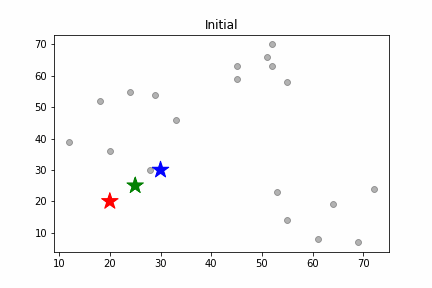

In [9]:
gif.save(frames, "k_means.gif", duration=1000)
Image(filename="k_means.gif")